### Telecom churn case study

### Business Problem Overview:
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.  
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

The objective is to serve below two purposes:
1. To predict whether a high-value customer will churn or not, in near future
2. To identify important variables that are strong predictors of churn.

### The case study is divided in 5 steps
1. Data Understanding
2. Data Cleaning
3. Data Analysis
4. Handling Class Imbalance
5. Model Building

## 1. Data Understanding

In [72]:
## Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [73]:
### Loading data

data = pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [74]:
## To display complete rows and columns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', None)

In [75]:
data.shape

(99999, 226)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [77]:
## Check the null values
data.isnull().sum()/len(data)*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

### 2. Data Cleaning

In [78]:
### Identifying columns with more than 40% missing values

cut_off = 40
cols_to_drop = list(data.columns[data.isnull().sum()/len(data)*100>cut_off])
print(cols_to_drop)
print("No. of columns to be dropped:", len(cols_to_drop))

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
No. of columns to be dropped: 40


In [79]:
### Dropping the columns with 40% missing values

data = data.drop(cols_to_drop, axis = 1)

In [80]:
data.shape

(99999, 186)

In [81]:
## Check the null values
data.isnull().sum()/len(data)*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t

In [82]:
### Imputing rest of the null values with median values

for i in data.select_dtypes(include=[float,int]).columns:
    if data[i].isnull().mean()>0:
        med = data[i].median()
        data[i]= data[i].fillna(med)

In [83]:
data.isnull().sum()/len(data)*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          0.000000
std_og_t2o_mou          0.000000
loc_ic_t2o_mou          0.000000
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             0.000000
onnet_mou_7             0.000000
onnet_mou_8             0.000000
onnet_mou_9             0.000000
offnet_mou_6            0.000000
offnet_mou_7            0.000000
offnet_mou_8            0.000000
offnet_mou_9            0.000000
roam_ic_mou_6           0.000000
roam_ic_mou_7           0.000000
roam_ic_mou_8           0.000000
roam_ic_mou_9           0.000000
roam_og_mou_6           0.000000
roam_og_mou_7           0.000000
roam_og_mou_8           0.000000
roam_og_mou_9           0.000000
loc_og_t2t_mou_6        0.000000
loc_og_t2t

In [84]:
## Checking for unique values
data.nunique()

mobile_number           99999
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        1
last_date_of_month_8        1
last_date_of_month_9        1
arpu_6                  85681
arpu_7                  85308
arpu_8                  83615
arpu_9                  79937
onnet_mou_6             24313
onnet_mou_7             24336
onnet_mou_8             24089
onnet_mou_9             23565
offnet_mou_6            31140
offnet_mou_7            31024
offnet_mou_8            30908
offnet_mou_9            30077
roam_ic_mou_6            6512
roam_ic_mou_7            5230
roam_ic_mou_8            5315
roam_ic_mou_9            4827
roam_og_mou_6            8038
roam_og_mou_7            6639
roam_og_mou_8            6504
roam_og_mou_9            5882
loc_og_t2t_mou_6        13539
loc_og_t2t_mou_7        13411
loc_og_t2t_mou_8        13336
loc_og_t2t_mou_9        12949
loc_og_t2m

In [85]:
## Dropping columns with single values as they are not very useful

data_nun = data.nunique()
data_nun = data_nun[data_nun ==1]
print(data_nun)
print("No. of columns to be dropped:", len(data_nun))

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
last_date_of_month_9    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64
No. of columns to be dropped: 16


In [86]:
### Dropping the values

data_nun = list(data_nun.index)
data = data.drop(data_nun, axis = 1)

In [87]:
data.shape

(99999, 170)

In [88]:
data.isnull().sum()/len(data)*100

mobile_number          0.000000
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            0.000000
onnet_mou_7            0.000000
onnet_mou_8            0.000000
onnet_mou_9            0.000000
offnet_mou_6           0.000000
offnet_mou_7           0.000000
offnet_mou_8           0.000000
offnet_mou_9           0.000000
roam_ic_mou_6          0.000000
roam_ic_mou_7          0.000000
roam_ic_mou_8          0.000000
roam_ic_mou_9          0.000000
roam_og_mou_6          0.000000
roam_og_mou_7          0.000000
roam_og_mou_8          0.000000
roam_og_mou_9          0.000000
loc_og_t2t_mou_6       0.000000
loc_og_t2t_mou_7       0.000000
loc_og_t2t_mou_8       0.000000
loc_og_t2t_mou_9       0.000000
loc_og_t2m_mou_6       0.000000
loc_og_t2m_mou_7       0.000000
loc_og_t2m_mou_8       0.000000
loc_og_t2m_mou_9       0.000000
loc_og_t2f_mou_6       0.000000
loc_og_t2f_mou_7       0.000000
loc_og_t

#### Filter high-value customers - Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [89]:
data['avg_rech_6_7'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2

In [90]:
x_70_value = data['avg_rech_6_7'].quantile(0.7)
x_70_value

368.5

#### 368.5 is the 70th percentile of average recharge amount of June and July months

In [91]:
### Filtering the high value customers

data = data[data['avg_rech_6_7']>=x_70_value]

In [92]:
data.shape

(30011, 171)

#### After filtering the 70th percentile, rows has reduced by 30k

### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
total_ic_mo_9
totaloo_mog_u
9vol_2g_mb_9
9vol_3g_mb_9_mb_9

In [93]:
data['churn'] = np.where((data['total_ic_mou_9']==0) & (data['total_og_mou_9']==0) & (data['vol_2g_mb_9']==0) & (data['vol_3g_mb_9']==0), 1, 0)

In [94]:
data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,churn
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.00,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.0,22.43,4.66,0.75,13.53

In [95]:
data.shape

(30011, 172)

#### Removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [96]:
### Filtering columns with 9 in their names

col_with_9 = [col for col in data.columns if '_9' in col]
print(col_with_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [97]:
### Dropping the above columns

data = data.drop(col_with_9, axis = 1)

In [98]:
### Checking the shape

data.shape

(30011, 131)

In [99]:
### Dropping mobile number column asa it is of no use

data = data.drop('mobile_number',axis=1)

In [100]:
## Dropping date column as it is of no use

data = data.drop(['date_of_last_rech_6', 'date_of_last_rech_7' , 'date_of_last_rech_8'], axis=1)

In [101]:
data.isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_mou_6          0
std_og_mou_7          0
std_og_mou_8    

### 3. Exploratory Data Analysis

In [102]:
## Checking arpu(Average revenue per user column)

data.arpu_6.describe()

count    30011.000000
mean       587.284404
std        442.722413
min      -2258.709000
25%        364.161000
50%        495.682000
75%        703.922000
max      27731.088000
Name: arpu_6, dtype: float64

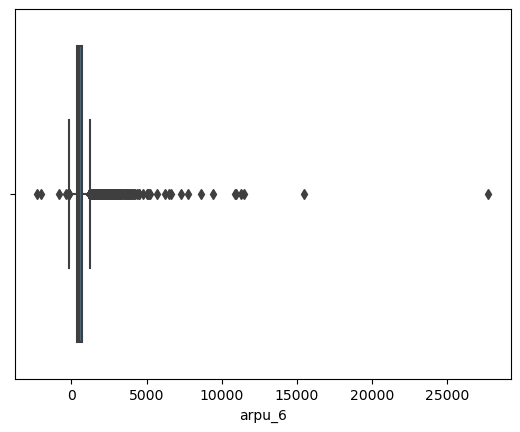

In [103]:
### Plotting boxplot for arpu_6 for June month

sns.boxplot(x=data['arpu_6'])
plt.show()

### We have observed there are outliers in this column which means ther are high value customers

In [104]:
## Checking arpu(Average revenue per user column) for July month

data.arpu_7.describe()

count    30011.000000
mean       589.135427
std        462.897814
min      -2014.045000
25%        365.004500
50%        493.561000
75%        700.788000
max      35145.834000
Name: arpu_7, dtype: float64

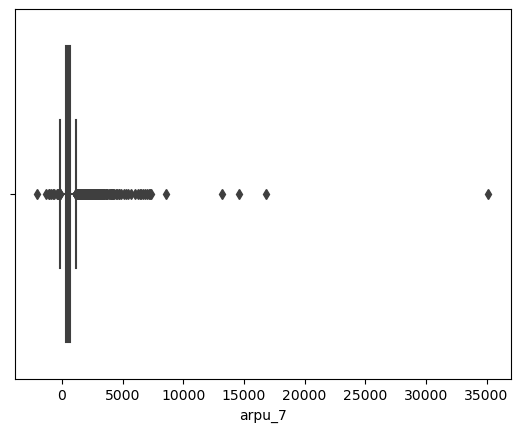

In [105]:
### Plotting boxplot for arpu_7 for July month

sns.boxplot(x=data['arpu_7'])
plt.show()

### There are high value customers present in this July month also

In [106]:
## Checking arpu(Average revenue per user column) for August month

data.arpu_8.describe()

count    30011.000000
mean       534.857433
std        492.259586
min       -945.808000
25%        289.609500
50%        452.091000
75%        671.150000
max      33543.624000
Name: arpu_8, dtype: float64

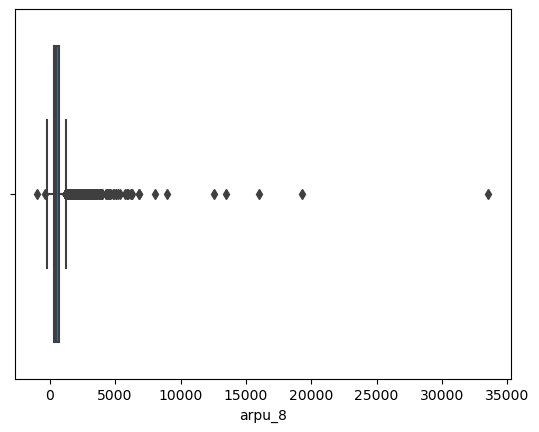

In [107]:
### Plotting boxplot for arpu_8 for August month

sns.boxplot(x=data['arpu_8'])
plt.show()

#### We can see in August month also high value customers are present

##### We will now check the Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. 
##### June & July months are Good phase
##### August month is Action phase

#### Adding new column - arpu(Average revenue per user) - This indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [294]:
### Finding total arpu(Average revenue per user) of good phase

data['avg_arpu_good'] = (data['arpu_6'] + data['arpu_7'])/2

In [109]:
### Finding difference of arpu between both the phase

data['diff_arpu'] = data['arpu_8'] - data['avg_arpu_good'] 

In [110]:
# Checking whether the arpu has decreased in action phase

data['arpu_decreased'] = np.where((data['diff_arpu'] < 0),1,0)

In [111]:
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,churn,avg_arpu_good,diff_arpu,arpu_decreased
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1209.5150,1961.9650,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,435.4720,-298.1100,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0,349.2585,244.0015,0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74

#### Adding new column MOU (Minutes of usage - voice calls) - This indicates the minutes of usage of the customer has decreased in the action phase than the good phase

In [112]:
### Finding total MOU of good phase

data['avg_mou_calls_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'] + data['total_og_mou_7'] + data['total_ic_mou_7'])/2

In [113]:
### Finding total MOU of action phase

data['total_mou_calls_action'] = data['total_og_mou_8'] + data['total_ic_mou_8']

In [114]:
### Finding difference of MOU between both the phase

data['diff_mou_calls'] = data['total_mou_calls_action'] - data['avg_mou_calls_good'] 

In [115]:
# Checking whether the mou has decreased in action phase

data['mou_decreased_calls'] = np.where((data['diff_mou_calls'] < 0),1,0)

In [116]:
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,churn,avg_arpu_good,diff_arpu,arpu_decreased,avg_mou_calls_good,total_mou_calls_action,diff_mou_calls,mou_decreased_calls
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1209.5150,1961.9650,0,1140.635,778.90,-361.735,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,435.4720,-298.1100,1,536.185,188.10,-348.085,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.0

#### Adding new column Recharge number (rech_num) - This indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [117]:
### Finding total recharge number of good phase

data['avg_rech_num_good'] = (data['total_rech_num_6'] + data['total_rech_num_7'])/2

In [118]:
### Finding difference of total recharge number between both the phase

data['diff_rech_num'] =  data['total_rech_num_8'] - data['avg_rech_num_good']

In [119]:
# Checking whether the total rechange number has decreased in action phase

data['rech_decreased_num'] = np.where((data['diff_rech_num'] < 0),1,0)

In [120]:
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,churn,avg_arpu_good,diff_arpu,arpu_decreased,avg_mou_calls_good,total_mou_calls_action,diff_mou_calls,mou_decreased_calls,avg_rech_num_good,diff_rech_num,rech_decreased_num
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1209.5150,1961.9650,0,1140.635,778.90,-361.735,1,5.0,2.0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,435.4720,-298.1100,1,536.185,188.10,-348.085,1,20.0,-6.0,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,

#### Adding new column - Recharge Amount (rech_amt) - This indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [121]:
### Finding total recharge amount of good phase

data['avg_rech_amt_good'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2

In [122]:
### Finding difference of total recharge amount between both the phase

data['diff_rech_amt'] =  data['total_rech_amt_8'] - data['avg_rech_amt_good']

In [123]:
# Checking whether the total rechange amount has decreased in action phase

data['rech_decreased_amt'] = np.where((data['diff_rech_amt'] < 0),1,0)

In [124]:
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,churn,avg_arpu_good,diff_arpu,arpu_decreased,avg_mou_calls_good,total_mou_calls_action,diff_mou_calls,mou_decreased_calls,avg_rech_num_good,diff_rech_num,rech_decreased_num,avg_rech_amt_good,diff_rech_amt,rech_decreased_amt
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1,1209.5150,1961.9650,0,1140.635,778.90,-361.735,1,5.0,2.0,0,1185.0,2453.0,0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0,435.4720,-298.1100,1,536.185,188.10,-348.085,1,20.0,-6.0,1,519.0,-399.0,1
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,

## Univariate Analysis

#### Plotting of Churn rate on the basis of whether customer decreased MOU in action phase

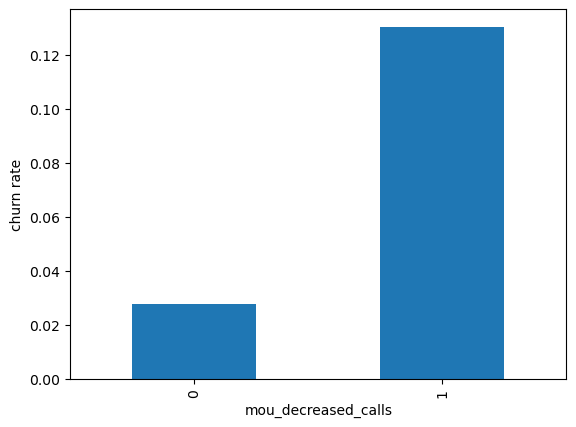

In [125]:
data.groupby('mou_decreased_calls')['churn'].mean().plot.bar()
plt.ylabel('churn rate')
plt.show()

#### We can see that Churn rate is higher for cutomers whose mou decreased in action phase

### Plotting of Churn rate on the basis whether the customer decreased number of recharge in action phase

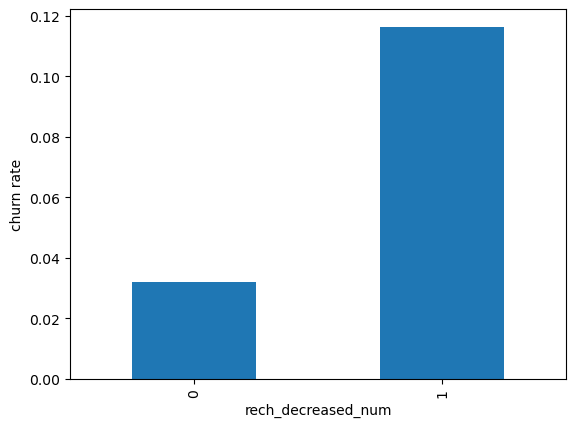

In [126]:
data.groupby('rech_decreased_num')['churn'].mean().plot.bar()
plt.ylabel('churn rate')
plt.show()

#### Churn rate is higher for customers who has decreased in number of recharge in action phase

#### Plotting of Churn rate on the basis whether the customer decreased amount of recharge in action phase

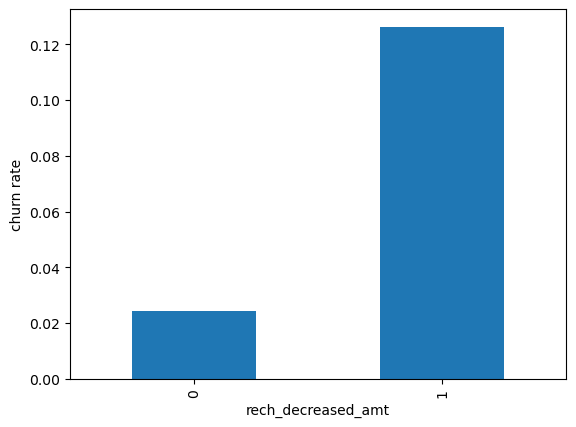

In [127]:
data.groupby('rech_decreased_amt')['churn'].mean().plot.bar()
plt.ylabel('churn rate')
plt.show()

#### Churn rate of customers is higher whose amount of recharge has reducted in action phase. 

#### Plotting of the average revenue per customer (churn and not churn) in the action phase

In [306]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

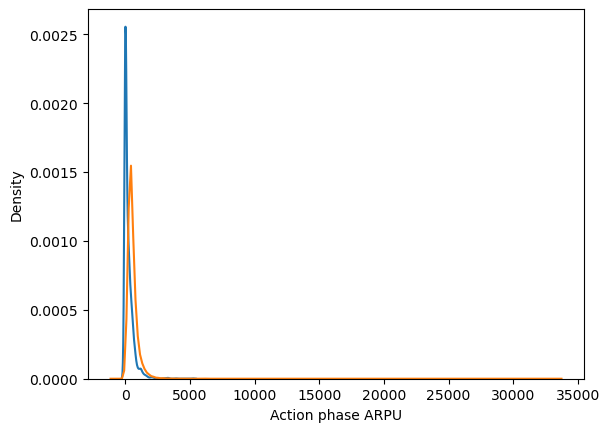

In [307]:
# Plotting distribution graph
pl_dist = sns.distplot(data_churn['arpu_8'],label='churn',hist=False)
pl_dist = sns.distplot(data_non_churn['arpu_8'],label='not churn',hist=False)
pl_dist.set(xlabel='Action phase ARPU')
plt.show()

#### Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.

## Bivariate Analysis

#### Plotting of churn rate by the decreasing recharge amount and number of recharge in the action phase

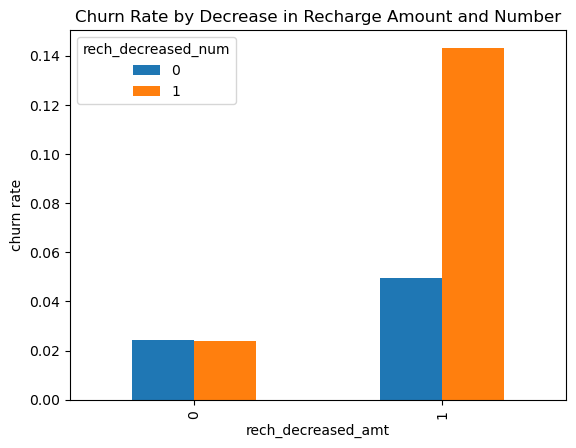

In [302]:
grouped_data = data.groupby(['rech_decreased_amt', 'rech_decreased_num'])['churn'].mean().unstack()
grouped_data.plot.bar()
plt.ylabel('churn rate')
plt.title('Churn Rate by Decrease in Recharge Amount and Number')
plt.show()

#### The plot indicates that customers who experienced a decrease in both their recharge amount and the number of recharges during the action phase have a higher churn rate compared to those in the good phase.

#### Plotting of churn rate by the decreasing recharge amount and MOU in the action phase

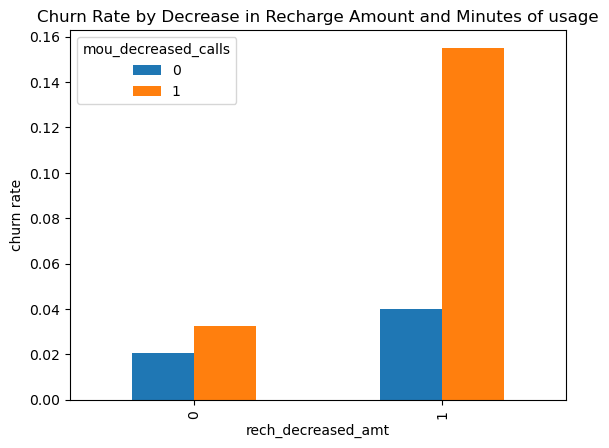

In [303]:
grouped_data = data.groupby(['rech_decreased_amt', 'mou_decreased_calls'])['churn'].mean().unstack()
grouped_data.plot.bar()
plt.ylabel('churn rate')
plt.title('Churn Rate by Decrease in Recharge Amount and Minutes of usage')
plt.show()

#### The plot indicates that customers who experienced a decrease in both their recharge amount and the Minutes of usage(MOU) during the action phase have a higher churn rate compared to those in the good phase.

#### Plotting of churn rate by the decreasing ARPU and MOU in the action phase

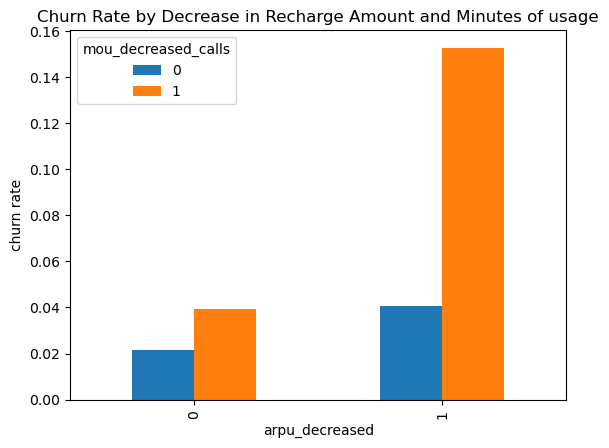

In [308]:
grouped_data = data.groupby(['arpu_decreased', 'mou_decreased_calls'])['churn'].mean().unstack()
grouped_data.plot.bar()
plt.ylabel('churn rate')
plt.title('Churn Rate by Decrease in Recharge Amount and Minutes of usage')
plt.show()

#### The plot indicates that customers who experienced a decrease in both their ARPU and the Minutes of usage(MOU) during the action phase have a higher churn rate compared to those in the good phase.

In [128]:
data.shape

(30011, 140)

In [129]:
print(data.churn.value_counts())
100*data.churn.value_counts(normalize=True).reset_index()

churn
0    27418
1     2593
Name: count, dtype: int64


,churn,proportion
0,0,91.359835
1,100,8.640165


### Class Imbalance

Text(0.5, 1.0, 'Class Distributions')

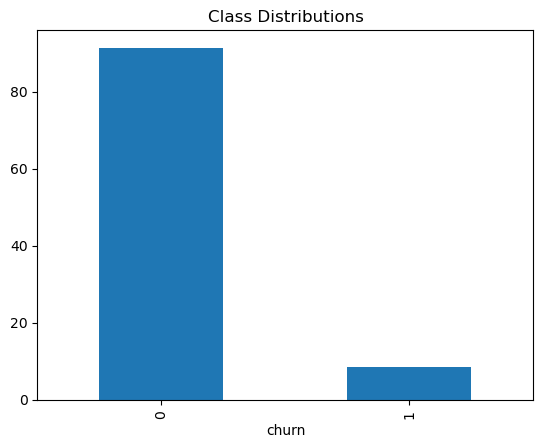

In [130]:
### Checking for class Imbalance

(data.churn.value_counts(normalize=True)*100).plot.bar()
plt.title('Class Distributions')

### We can observe from the graph that churn rate is very less than non churn rate and this shows class imbalance

### Handling Class Imbalance

We can handle imbalanced classes by balancing the classes by increasing minority or decreasing majority.

We can do that by following few techniques
1. Random Under-Sampling
2. Random Over-Sampling
3. SMOTE - Synthetic Minority Oversampling Technique
4. ADASYN - Adaptive Synthetic Sampling Method
5. SMOTETomek - Over-sampling followed by under-sampling

### Before starting Imbalance techniques, we will split the data into train and test

In [142]:
### Splitting data into train and test 

from sklearn.model_selection import train_test_split
y = data['churn']
X = data.drop('churn', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify = y, random_state=56)

In [143]:
print(y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

churn
0    19192
1     1815
Name: count, dtype: int64


,churn,proportion
0,0,0.9136
1,1,0.0864


In [144]:
print(y_test.value_counts())
y_test.value_counts(normalize = True).reset_index()

churn
0    8226
1     778
Name: count, dtype: int64


,churn,proportion
0,0,0.913594
1,1,0.086406


In [145]:
col = X_train.columns

In [147]:
### Scaling data using MinMax scaler as there are outliers present in the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [148]:
# Scaling the data
X_train[col]=scaler.fit_transform(X_train[col])

In [149]:
X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,avg_arpu_good,diff_arpu,arpu_decreased,avg_mou_calls_good,total_mou_calls_action,diff_mou_calls,mou_decreased_calls,avg_rech_num_good,diff_rech_num,rech_decreased_num,avg_rech_amt_good,diff_rech_amt,rech_decreased_amt
count,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000
mean,0.150018,0.083885,0.087226,0.040535,0.037536,0.025126,0.062364,0.051075,0.026997,0.006618,0.003613,0.004636,0.007750,0.007944,0.004227,0.014952,0.013579,0.0082

In [150]:
## Scaling the test data

X_test[col]=scaler.transform(X_test[col])

In [151]:
X_test.shape

(9004, 139)

### We are using Imbalance techniques first on Logistic regression

#### Logistic Regression - Base

In [152]:
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [153]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [154]:
y_pred = lreg.predict(X_test)

In [155]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9188138605064415
F1 score:  0.22481442205726404
Recall:  0.13624678663239073
Precision:  0.6424242424242425

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      8226
           1       0.64      0.14      0.22       778

    accuracy                           0.92      9004
   macro avg       0.78      0.56      0.59      9004
weighted avg       0.90      0.92      0.89      9004


 confussion matrix:
 [[8167   59]
 [ 672  106]]


#### Logistic Regression - Random Under Sampling
1. Randomly remove majority class observations
2. Help balance the dataset
3. Discarded observations could have important information
4. May lead to bias

In [156]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

3630

In [157]:
print(sorted(Counter(y_resampled_us).items()))

[(0, 1815), (1, 1815)]


In [158]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

y_pred_us = lreg_us.predict(X_test)

In [159]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.7849844513549533
F1 score:  0.4028377544725478
Recall:  0.8393316195372751
Precision:  0.2650162337662338

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87      8226
           1       0.27      0.84      0.40       778

    accuracy                           0.78      9004
   macro avg       0.62      0.81      0.64      9004
weighted avg       0.92      0.78      0.83      9004


 confussion matrix:
 [[6415 1811]
 [ 125  653]]


#### Logistic Regression -  Tomek Links
1. Tomke link is a heuristic undersampling technique based on a distance measure. 
2. Tomek link is established based on a distance between instances from two different classes which are further used for removing majority class instance.

In [160]:
from imblearn.under_sampling import TomekLinks
tomek_sample = TomekLinks(sampling_strategy='majority')
X_resampled_tomek, y_resampled_tomek = tomek_sample.fit_resample(X_train, y_train)
len(X_resampled_tomek)

20702

In [161]:
print(sorted(Counter(y_resampled_tomek).items()))

[(0, 18887), (1, 1815)]


In [162]:
lreg_tomek = LogisticRegression()
lreg_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_tomek = lreg_tomek.predict(X_test)

In [163]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_tomek))
print ('Recall: ', recall_score(y_test, y_pred_tomek))
print ('Precision: ', precision_score(y_test, y_pred_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_tomek))

Accuracy:  0.9199244780097734
F1 score:  0.2782782782782782
Recall:  0.17866323907455012
Precision:  0.6289592760180995

 clasification report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      8226
           1       0.63      0.18      0.28       778

    accuracy                           0.92      9004
   macro avg       0.78      0.58      0.62      9004
weighted avg       0.90      0.92      0.90      9004


 confussion matrix:
 [[8144   82]
 [ 639  139]]


#### Logistic Regression - Random OverSampling
1. Randomly add more minority observations by replication
2. No information loss
3. Prone to overfitting due to copying same information

In [164]:
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy=1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

38384

In [165]:
print(sorted(Counter(y_resampled_os).items()))

[(0, 19192), (1, 19192)]


In [166]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [167]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))

Accuracy:  0.8203020879609063
F1 score:  0.44322092222986925
Recall:  0.8277634961439588
Precision:  0.3026315789473684

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      8226
           1       0.30      0.83      0.44       778

    accuracy                           0.82      9004
   macro avg       0.64      0.82      0.67      9004
weighted avg       0.92      0.82      0.85      9004


 confussion matrix:
 [[6742 1484]
 [ 134  644]]


#### Logistic Regression - SMOTE - Synthetic Minority Oversampling Technique Creates new "Synthetic" observations
1. Identify the feature vector and its nearest neighbour.2. 
Take the difference between the tw.o3. 
Multiply the difference with a random number between 0 and. 4. 1
Identify a new point on the line segment by adding the random number to feature vec.t5. or
Repeat the process for identified feature vec.tors

In [168]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

38384

In [169]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 19192), (1, 19192)]


In [170]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [171]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.8243003109729009
F1 score:  0.44491228070175437
Recall:  0.8149100257069408
Precision:  0.305984555984556

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8226
           1       0.31      0.81      0.44       778

    accuracy                           0.82      9004
   macro avg       0.64      0.82      0.67      9004
weighted avg       0.92      0.82      0.86      9004


 confussion matrix:
 [[6788 1438]
 [ 144  634]]


#### Logistic Regression - ADASYN
1. In ADASYN, the minority examples are generated based on their density distribution.2. 
More synthetic data are generated from minority class samples that are harder to learn as compared with those minority samples that are easier to learn


In [172]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

38193

In [173]:
print(sorted(Counter(y_resampled_ada).items()))

[(0, 19192), (1, 19001)]


In [174]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = lreg_ada.predict(X_test)

In [175]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ada))

Accuracy:  0.7982007996446024
F1 score:  0.4207841887153331
Recall:  0.8483290488431876
Precision:  0.2797795676133955

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.88      8226
           1       0.28      0.85      0.42       778

    accuracy                           0.80      9004
   macro avg       0.63      0.82      0.65      9004
weighted avg       0.92      0.80      0.84      9004


 confussion matrix:
 [[6527 1699]
 [ 118  660]]


#### Logistic Regression - SMOTE+TOMEK
1. Tomek links can be used as an under-sampling method or as a data cleaning method.
2. Tomek links to the over-sampled training set as a data cleaning method. Thus, instead of removing only the majority class examples that from Tomek links, examples from both classes are removed.

In [176]:
# SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)

38348

In [177]:
print(sorted(Counter(y_resampled_smt_tmk).items()))

[(0, 19174), (1, 19174)]


In [178]:
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_smt_tmk = lreg_smt_tmk.predict(X_test)

In [179]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))

Accuracy:  0.8247445579742336
F1 score:  0.44553759662684467
Recall:  0.8149100257069408
Precision:  0.3065764023210832

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8226
           1       0.31      0.81      0.45       778

    accuracy                           0.82      9004
   macro avg       0.64      0.82      0.67      9004
weighted avg       0.92      0.82      0.86      9004


 confussion matrix:
 [[6792 1434]
 [ 144  634]]


#### Decision Trees - Base

In [181]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

In [182]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc))
print ('F1 score: ', f1_score(y_test, y_pred_dtc))
print ('Recall: ', recall_score(y_test, y_pred_dtc))
print ('Precision: ', precision_score(y_test, y_pred_dtc))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc))

Accuracy:  0.9101510439804531
F1 score:  0.49845009299442034
Recall:  0.5167095115681234
Precision:  0.481437125748503

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      8226
           1       0.48      0.52      0.50       778

    accuracy                           0.91      9004
   macro avg       0.72      0.73      0.72      9004
weighted avg       0.91      0.91      0.91      9004


 confussion matrix:
 [[7793  433]
 [ 376  402]]


#### Decision Tree - Random UnderSampling

In [183]:
from sklearn.tree import DecisionTreeClassifier
dtc_us = DecisionTreeClassifier(random_state=0)
dtc_us.fit(X_resampled_us, y_resampled_us)

y_pred_dtc_us = dtc_us.predict(X_test)

In [184]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_us))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_us))
print ('Recall: ', recall_score(y_test, y_pred_dtc_us))
print ('Precision: ', precision_score(y_test, y_pred_dtc_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_us))

Accuracy:  0.7883163038649489
F1 score:  0.3835705045278137
Recall:  0.7622107969151671
Precision:  0.25626620570440795

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87      8226
           1       0.26      0.76      0.38       778

    accuracy                           0.79      9004
   macro avg       0.61      0.78      0.63      9004
weighted avg       0.91      0.79      0.83      9004


 confussion matrix:
 [[6505 1721]
 [ 185  593]]


#### Decision Trees - Tomek Links

In [185]:
from sklearn.tree import DecisionTreeClassifier
dtc_tomek = DecisionTreeClassifier(random_state=0)
dtc_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_dtc_tomek = dtc_tomek.predict(X_test)

In [186]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_tomek))
print ('Recall: ', recall_score(y_test, y_pred_dtc_tomek))
print ('Precision: ', precision_score(y_test, y_pred_dtc_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_tomek))

Accuracy:  0.9089293647267881
F1 score:  0.49507389162561577
Recall:  0.5167095115681234
Precision:  0.475177304964539

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      8226
           1       0.48      0.52      0.50       778

    accuracy                           0.91      9004
   macro avg       0.71      0.73      0.72      9004
weighted avg       0.91      0.91      0.91      9004


 confussion matrix:
 [[7782  444]
 [ 376  402]]


#### Decision Trees - Random Over-Sampling

In [187]:
from sklearn.tree import DecisionTreeClassifier
dtc_os = DecisionTreeClassifier(random_state=0)
dtc_os.fit(X_resampled_os, y_resampled_os)

y_pred_dtc_os = dtc_os.predict(X_test)

In [188]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_os))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_os))
print ('Recall: ', recall_score(y_test, y_pred_dtc_os))
print ('Precision: ', precision_score(y_test, y_pred_dtc_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_os))

Accuracy:  0.9118169702354509
F1 score:  0.48708010335917307
Recall:  0.4845758354755784
Precision:  0.4896103896103896

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      8226
           1       0.49      0.48      0.49       778

    accuracy                           0.91      9004
   macro avg       0.72      0.72      0.72      9004
weighted avg       0.91      0.91      0.91      9004


 confussion matrix:
 [[7833  393]
 [ 401  377]]


#### Decision Trees - SMOTE

In [189]:
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [190]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

Accuracy:  0.8833851621501555
F1 score:  0.4626407369498464
Recall:  0.5809768637532133
Precision:  0.3843537414965986

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      8226
           1       0.38      0.58      0.46       778

    accuracy                           0.88      9004
   macro avg       0.67      0.75      0.70      9004
weighted avg       0.91      0.88      0.89      9004


 confussion matrix:
 [[7502  724]
 [ 326  452]]


#### Decision Trees - ADASYN

In [191]:
from sklearn.tree import DecisionTreeClassifier
dtc_ada = DecisionTreeClassifier(random_state=0)
dtc_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_dtc_ada = dtc_ada.predict(X_test)

In [192]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_ada))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_ada))
print ('Recall: ', recall_score(y_test, y_pred_dtc_ada))
print ('Precision: ', precision_score(y_test, y_pred_dtc_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_ada))

Accuracy:  0.8833851621501555
F1 score:  0.4587628865979382
Recall:  0.5719794344473008
Precision:  0.382960413080895

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      8226
           1       0.38      0.57      0.46       778

    accuracy                           0.88      9004
   macro avg       0.67      0.74      0.70      9004
weighted avg       0.91      0.88      0.89      9004


 confussion matrix:
 [[7509  717]
 [ 333  445]]


#### Decision Trees - SMOTE+TOMEK

In [193]:
from sklearn.tree import DecisionTreeClassifier
dtc_smt_tmk = DecisionTreeClassifier(random_state=0)
dtc_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_dtc_smt_tmk = dtc_smt_tmk.predict(X_test)

In [194]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt_tmk))

Accuracy:  0.8874944469124834
F1 score:  0.47157016171100674
Recall:  0.5809768637532133
Precision:  0.3968393327480246

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      8226
           1       0.40      0.58      0.47       778

    accuracy                           0.89      9004
   macro avg       0.68      0.75      0.70      9004
weighted avg       0.91      0.89      0.90      9004


 confussion matrix:
 [[7539  687]
 [ 326  452]]


#### Random Forest - Base

In [195]:
# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [197]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.94002665482008
F1 score:  0.5774647887323945
Recall:  0.47429305912596403
Precision:  0.738

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      8226
           1       0.74      0.47      0.58       778

    accuracy                           0.94      9004
   macro avg       0.84      0.73      0.77      9004
weighted avg       0.93      0.94      0.93      9004


 confussion matrix:
 [[8095  131]
 [ 409  369]]


#### Random Forest - Random UnderSampling

In [198]:
rf_us = RandomForestClassifier()
rf_us.fit(X_resampled_us, y_resampled_us)

y_pred_rf_us = rf_us.predict(X_test)

In [199]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us))
print ('F1 score: ', f1_score(y_test, y_pred_rf_us))
print ('Recall: ', recall_score(y_test, y_pred_rf_us))
print ('Precision: ', precision_score(y_test, y_pred_rf_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))

Accuracy:  0.8804975566414927
F1 score:  0.5409556313993175
Recall:  0.8149100257069408
Precision:  0.40485312899106

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      8226
           1       0.40      0.81      0.54       778

    accuracy                           0.88      9004
   macro avg       0.69      0.85      0.74      9004
weighted avg       0.93      0.88      0.90      9004


 confussion matrix:
 [[7294  932]
 [ 144  634]]


#### Random Forest - Tomek Links

In [200]:
rf_tomek = RandomForestClassifier()
rf_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_rf_tomek = rf_tomek.predict(X_test)

In [202]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_rf_tomek))
print ('Recall: ', recall_score(y_test, y_pred_rf_tomek))
print ('Precision: ', precision_score(y_test, y_pred_rf_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_tomek))

Accuracy:  0.9399155930697468
F1 score:  0.5854406130268199
Recall:  0.4910025706940874
Precision:  0.7248576850094877

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      8226
           1       0.72      0.49      0.59       778

    accuracy                           0.94      9004
   macro avg       0.84      0.74      0.78      9004
weighted avg       0.93      0.94      0.93      9004


 confussion matrix:
 [[8081  145]
 [ 396  382]]


#### Random Forest - Random Over-Sampling

In [203]:
rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [204]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))

Accuracy:  0.9399155930697468
F1 score:  0.6024981631153564
Recall:  0.5269922879177378
Precision:  0.7032590051457976

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      8226
           1       0.70      0.53      0.60       778

    accuracy                           0.94      9004
   macro avg       0.83      0.75      0.78      9004
weighted avg       0.93      0.94      0.94      9004


 confussion matrix:
 [[8053  173]
 [ 368  410]]


#### Random Forest - SMOTE

In [205]:
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [206]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

Accuracy:  0.926810306530431
F1 score:  0.6065671641791046
Recall:  0.6529562982005142
Precision:  0.5663322185061316

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      8226
           1       0.57      0.65      0.61       778

    accuracy                           0.93      9004
   macro avg       0.77      0.80      0.78      9004
weighted avg       0.93      0.93      0.93      9004


 confussion matrix:
 [[7837  389]
 [ 270  508]]


#### Random Forest - ADASYN

In [207]:
rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

In [208]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ada))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ada))
print ('Recall: ', recall_score(y_test, y_pred_rf_ada))
print ('Precision: ', precision_score(y_test, y_pred_rf_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ada))

Accuracy:  0.9264771212794314
F1 score:  0.6115023474178404
Recall:  0.6696658097686375
Precision:  0.562634989200864

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      8226
           1       0.56      0.67      0.61       778

    accuracy                           0.93      9004
   macro avg       0.77      0.81      0.79      9004
weighted avg       0.93      0.93      0.93      9004


 confussion matrix:
 [[7821  405]
 [ 257  521]]


#### Random Forest - SMOTE+TOMEK

In [209]:
rf_smt_tmk = RandomForestClassifier()
rf_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_rf_smt_tmk = rf_smt_tmk.predict(X_test)

In [210]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt_tmk))

Accuracy:  0.926810306530431
F1 score:  0.6027727546714888
Recall:  0.6426735218508998
Precision:  0.5675368898978433

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      8226
           1       0.57      0.64      0.60       778

    accuracy                           0.93      9004
   macro avg       0.77      0.80      0.78      9004
weighted avg       0.93      0.93      0.93      9004


 confussion matrix:
 [[7845  381]
 [ 278  500]]


### Lets compare the results of class imbalance techniques ran on different algorithms

In [ ]:
                        Logistic Regression				              Decision Tree				                     Random Forest			
        	Accuracy	Precision	Recall	F1 score	Accuracy	Precision	Recall	F1 score	Accuracy	Precision	Recall	F1 score
Base	    0.91881	     0.64242	0.13624	0.22481	    0.91015	    0.48143	    0.5167	 0.49845	0.94002	      0.738	    0.47429	 0.57746
Random US	0.78498	     0.26501	0.83933	0.40283	    0.78831	    0.25626	    0.76221	 0.38357	0.88049	      0.40485	0.81491	 0.54095
Tomek Links	0.91992	     0.62895	0.17866	0.2782	    0.90892	    0.47517	    0.5167	 0.49507	0.93991	      0.72485	0.491	 0.58544
Random OS	0.8203	     0.30263	0.82776	0.44322	    0.91181	    0.48961	    0.48457	 0.48708	0.93991	      0.70325	0.52699	 0.60249
SMOTE	    0.8243	     0.30598	0.81491	0.44491	    0.88338	    0.38435	    0.58097	 0.46264	0.92681	      0.56633	0.65295	 0.60656
ADASYN	    0.7982	     0.27977	0.84832	0.42078	    0.88338	    0.38296	    0.57197	 0.45876	0.92647	      0.56263	0.66966	 0.6115
SMOTE+TOMEK	0.82474	     0.30657	0.81491	0.44553	    0.88749	    0.39683	    0.58097	 0.47157	0.92681	      0.56753	0.64267	 0.60277

#### From the above summary table we can see Recall value for Logistic Regression with ADASYN is hightest among all the algorithms. We can also notice that Recall value of Random Forest with Random Undersampling is close. 

#### We will chose Logistic Regression with ADAYSN method as the best performing model.

## 5. Model Building

## We will build Logistic Regression with ADAYSN

In [213]:
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_resampled_ada, y_resampled_ada)

In [214]:
# Checking the column selection
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 80),
 ('arpu_7', True, 1),
 ('arpu_8', False, 104),
 ('onnet_mou_6', False, 74),
 ('onnet_mou_7', False, 60),
 ('onnet_mou_8', False, 46),
 ('offnet_mou_6', False, 114),
 ('offnet_mou_7', False, 58),
 ('offnet_mou_8', False, 30),
 ('roam_ic_mou_6', False, 61),
 ('roam_ic_mou_7', False, 2),
 ('roam_ic_mou_8', False, 39),
 ('roam_og_mou_6', False, 66),
 ('roam_og_mou_7', False, 14),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 94),
 ('loc_og_t2t_mou_7', False, 105),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 28),
 ('loc_og_t2m_mou_7', False, 59),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 88),
 ('loc_og_t2f_mou_7', False, 44),
 ('loc_og_t2f_mou_8', False, 15),
 ('loc_og_t2c_mou_6', False, 36),
 ('loc_og_t2c_mou_7', False, 26),
 ('loc_og_t2c_mou_8', False, 91),
 ('loc_og_mou_6', False, 109),
 ('loc_og_mou_7', False, 65),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 93),
 ('std_og_t2t_mou_7', False, 72),
 ('std

In [216]:
col = X_resampled_ada.columns[rfe.support_]
col

Index(['arpu_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sep_vbc_3g', 'total_mou_calls_action', 'diff_mou_calls'],
      dtype='object')

In [217]:
X_train_new = X_resampled_ada[col]

In [218]:
X_train_new.shape

(38193, 15)

## Assessing the model with StatsModels

In [219]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_new)
logm1 = sm.GLM(y_resampled_ada, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38193
Model:                            GLM   Df Residuals:                    38177
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16933.
Date:                Sat, 05 Oct 2024   Deviance:                       33866.
Time:                        12:31:00   Pearson chi2:                 1.65e+07
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3932
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.2379      0.189     17.101      0.000       2.867       3.609
arpu_7                    17.4413      0.942     18.515      0.000      15.595      19.288
roam_og_mou_8             15.2779      0.835     18.304      0.000      13.642      16.914
loc_og_t2t_mou_8         -76.6347     10.995     -6.970      0.000     -98.185     -55.085
loc_og_t2m_mou_8         -32.7654      5.080     -6.450      0.000     -42.722     -22.809
loc_og_mou_8              48.4996     10.977      4.418      0.000      26.985      70.014
total_ic_mou_8           -14.3347      0.672    -21.318      0.000     -15.653     -13.017
spl_ic_mou_8             -13.5917      1.126    -12.069      0.000     -15.799     -11.385
total_rech_num_8          -6.6988      0.328    -20.447      0.000      -7.341      -6.057
last_day_rch_amt_8       -19.4086      0.735    -26.410      0.000     -20.849     -17.968
monthly_2g_8              -7.1111      0.316    -22.493      0.000      -7.731      -6.491
sachet_2g_8               -7.7031      0.578    -13.333      0.000      -8.836      -6.571
monthly_3g_8             -16.2944      0.808    -20.154      0.000     -17.879     -14.710
sep_vbc_3g              -189.3023     15.594    -12.140      0.000    -219.865    -158.739
total_mou_calls_action    -6.9257      0.525    -13.184      0.000      -7.955      -5.896
diff_mou_calls            -9.6520      0.565    -17.070      0.000     -10.760      -8.544
==========================================================================================
"""

In [223]:
## Checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_og_mou_8,579.70
3,loc_og_t2m_mou_8,253.94
2,loc_og_t2t_mou_8,171.82
0,arpu_7,11.88
14,diff_mou_calls,11.53
13,total_mou_calls_action,4.89
7,total_rech_num_8,3.29
5,total_ic_mou_8,2.70
8,last_day_rch_amt_8,1.60
10,sachet_2g_8,1.24


#### p-values are in range but can see 'loc_og_mou_8' feature is having high VIF value 

In [224]:
### Dropping loc_og_mou_8 variable as it has high VIF value

X_train2 = X_train_new.drop('loc_og_mou_8', axis=1)

In [225]:
X_train2.shape

(38193, 14)

### Model - 2

In [297]:
## Building Model 2

X_train_sm1 = sm.add_constant(X_train2)
logm2 = sm.GLM(y_resampled_ada, X_train_sm1, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38193
Model:                            GLM   Df Residuals:                    38178
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16942.
Date:                Sat, 05 Oct 2024   Deviance:                       33884.
Time:                        20:04:15   Pearson chi2:                 1.75e+07
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3929
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.2075      0.189     16.954      0.000       2.837       3.578
arpu_7                    17.6249      0.945     18.651      0.000      15.773      19.477
roam_og_mou_8             15.1144      0.832     18.169      0.000      13.484      16.745
loc_og_t2t_mou_8         -29.2677      2.433    -12.030      0.000     -34.036     -24.499
loc_og_t2m_mou_8         -10.5764      0.734    -14.414      0.000     -12.015      -9.138
total_ic_mou_8           -14.0550      0.667    -21.084      0.000     -15.362     -12.748
spl_ic_mou_8             -13.7136      1.127    -12.167      0.000     -15.923     -11.505
total_rech_num_8          -6.8566      0.326    -21.003      0.000      -7.496      -6.217
last_day_rch_amt_8       -19.3357      0.736    -26.275      0.000     -20.778     -17.893
monthly_2g_8              -7.1298      0.316    -22.554      0.000      -7.749      -6.510
sachet_2g_8               -7.7519      0.579    -13.395      0.000      -8.886      -6.618
monthly_3g_8             -16.2964      0.808    -20.161      0.000     -17.881     -14.712
sep_vbc_3g              -187.8595     15.523    -12.102      0.000    -218.285    -157.434
total_mou_calls_action    -7.0512      0.526    -13.414      0.000      -8.081      -6.021
diff_mou_calls            -9.5193      0.564    -16.881      0.000     -10.625      -8.414
==========================================================================================
"""

In [227]:
## Checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train2
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_7,11.85
13,diff_mou_calls,11.48
12,total_mou_calls_action,4.88
6,total_rech_num_8,3.25
4,total_ic_mou_8,2.68
3,loc_og_t2m_mou_8,1.97
7,last_day_rch_amt_8,1.59
2,loc_og_t2t_mou_8,1.34
9,sachet_2g_8,1.24
1,roam_og_mou_8,1.22


#### p-values are in range but can see 'arpu_7' feature is having high VIF value 

In [228]:
## Dropping 'arpu_7' feature as it has high VIF value

X_train3=X_train2.drop('arpu_7', axis = 1)

### Model-3

In [229]:
### Building Model 3

X_train_sm2 = sm.add_constant(X_train3)
logm3 = sm.GLM(y_resampled_ada, X_train_sm2, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38193
Model:                            GLM   Df Residuals:                    38179
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17129.
Date:                Sat, 05 Oct 2024   Deviance:                       34257.
Time:                        12:55:35   Pearson chi2:                 3.14e+07
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3870
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.5392      0.143     38.853      0.000       5.260       5.819
roam_og_mou_8             17.5263      0.842     20.825      0.000      15.877      19.176
loc_og_t2t_mou_8         -29.9099      2.402    -12.452      0.000     -34.618     -25.202
loc_og_t2m_mou_8          -9.7485      0.721    -13.524      0.000     -11.161      -8.336
total_ic_mou_8           -14.8510      0.655    -22.663      0.000     -16.135     -13.567
spl_ic_mou_8             -14.2358      1.126    -12.648      0.000     -16.442     -12.030
total_rech_num_8          -6.0480      0.320    -18.897      0.000      -6.675      -5.421
last_day_rch_amt_8       -17.3532      0.740    -23.446      0.000     -18.804     -15.903
monthly_2g_8              -6.7926      0.311    -21.811      0.000      -7.403      -6.182
sachet_2g_8               -7.9135      0.579    -13.679      0.000      -9.047      -6.780
monthly_3g_8             -13.4987      0.775    -17.414      0.000     -15.018     -11.979
sep_vbc_3g              -178.1133     15.183    -11.731      0.000    -207.871    -148.355
total_mou_calls_action    -2.9535      0.476     -6.208      0.000      -3.886      -2.021
diff_mou_calls           -13.6025      0.515    -26.431      0.000     -14.611     -12.594
==========================================================================================
"""

In [230]:
## Checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new = X_train3
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_mou_calls_action,4.80
5,total_rech_num_8,3.23
12,diff_mou_calls,2.94
3,total_ic_mou_8,2.66
2,loc_og_t2m_mou_8,1.97
6,last_day_rch_amt_8,1.58
1,loc_og_t2t_mou_8,1.34
8,sachet_2g_8,1.24
0,roam_og_mou_8,1.19
9,monthly_3g_8,1.13


#### p-value and VIF values are in range, so Model-3 is the final model

In [235]:
### Getting the predicted value on the train set

y_train_pred = res.predict(X_train_sm2)
y_train_pred[:20]

0     0.125263
1     0.458255
2     0.504395
3     0.516139
4     0.794697
5     0.033049
6     0.137034
7     0.221877
8     0.806694
9     0.027933
10    0.244531
11    0.060358
12    0.175540
13    0.318585
14    0.215032
15    0.574613
16    0.001858
17    0.784088
18    0.150281
19    0.263930
dtype: float64

In [236]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:20]

array([0.12526286, 0.45825474, 0.50439472, 0.51613908, 0.79469668,
       0.03304945, 0.13703386, 0.22187704, 0.80669442, 0.02793311,
       0.2445305 , 0.06035792, 0.17554024, 0.31858534, 0.21503235,
       0.57461266, 0.00185779, 0.78408822, 0.15028113, 0.26393047])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [237]:
y_train_pred_final = pd.DataFrame({'Churn':y_resampled_ada.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.125263
1,0,0.458255
2,0,0.504395
3,0,0.516139
4,0,0.794697


In [239]:
##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.125263,0
1,0,0.458255,0
2,0,0.504395,1
3,0,0.516139,1
4,0,0.794697,1


In [240]:
from sklearn import metrics

In [241]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15004  4188]
 [ 3231 15770]]


In [242]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8057497447176184


#### Metrics beyond simply accuracy

In [243]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [246]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8299563180885217

In [247]:
# Let us calculate specificity
TN / float(TN+FP)

0.7817840766986244

In [244]:
# Lets calculate Precision = TP / TP + FP
TP / (TP + FP)

0.7901593346026656

In [245]:
#Lets calculate Recall = TP / TP + FN
TP / (TP + FN)

0.8299563180885217

In [248]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21821592330137557


In [249]:
# positive predictive value 
print (TP / float(TP+FP))

0.7901593346026656


In [250]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8228132711817933


#### Plotting ROC (Receiver Operating Characteristic) Curve

In [251]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [252]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

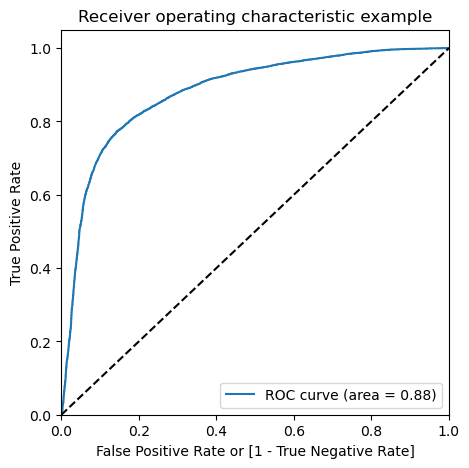

In [253]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Generally ROC curve should be a value close to 1 to be a good model. Here we are getting a good value of 0.88 indicating a good predictive model.

##### Finding Optimal Cutoff Point

In [254]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.125263,0,1,1,0,0,0,0,0,0,0,0
1,0,0.458255,0,1,1,1,1,1,0,0,0,0,0
2,0,0.504395,1,1,1,1,1,1,1,0,0,0,0
3,0,0.516139,1,1,1,1,1,1,1,0,0,0,0
4,0,0.794697,1,1,1,1,1,1,1,1,1,0,0


In [255]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.497500  1.000000  0.000000
0.1   0.1  0.651612  0.972475  0.333941
0.2   0.2  0.710680  0.948003  0.475719
0.3   0.3  0.755243  0.921162  0.590975
0.4   0.4  0.786793  0.881585  0.692945
0.5   0.5  0.805750  0.829956  0.781784
0.6   0.6  0.814076  0.767381  0.860306
0.7   0.7  0.797659  0.681911  0.912255
0.8   0.8  0.727725  0.499553  0.953627
0.9   0.9  0.557432  0.122572  0.987964


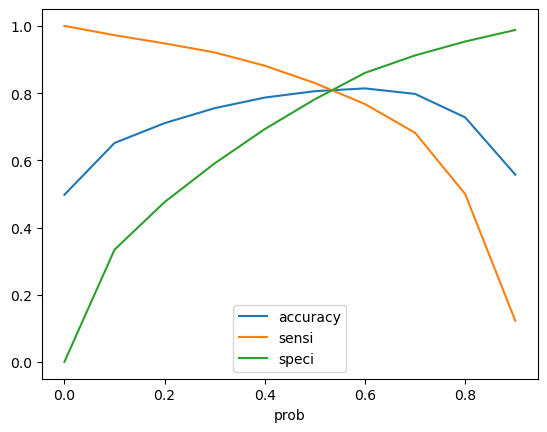

In [256]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### The cutoff rate coming is 0.55 but we will take 0.40 to achieve higher sensitivity

In [257]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.40 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.125263,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.458255,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.504395,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.516139,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.794697,1,1,1,1,1,1,1,1,1,0,0,1


In [258]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7867933914591679

In [259]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[13299,  5893],
       [ 2250, 16751]], dtype=int64)

In [262]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [263]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8815851797273828

In [264]:
# Let us calculate specificity
TN / float(TN+FP)

0.6929449770737808

In [265]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.3070550229262193


In [268]:
# Calculate Precision = TP / TP + FP
TP / (TP + FP)

0.7397544603426957

In [269]:
#Calculate Recall = TP / TP + FN
TP / (TP + FN)

0.8815851797273828

In [266]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7397544603426957


In [267]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8552961605247926


### Now Lets make prediction on test data

In [270]:
## Assiging X_train columns to X_test 
col = X_train3.columns

In [272]:
## Adding constant to X_test

X_test1 = X_test[col]
X_test_sm = sm.add_constant(X_test1)
X_test1.shape

(9004, 13)

In [273]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:20]

34193    0.477750
86836    0.039990
80744    0.250125
2754     0.287809
92633    0.675920
88387    0.191079
14534    0.025207
34721    0.660646
77819    0.174728
79711    0.319764
77825    0.598202
52233    0.145119
10179    0.922879
52808    0.223493
14766    0.242309
50886    0.414907
23395    0.947807
41993    0.312506
9327     0.358579
38871    0.143066
dtype: float64

In [274]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
34193,0.477750
86836,0.039990
80744,0.250125
2754,0.287809
92633,0.675920


In [277]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [278]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [281]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final = y_pred_final.rename(columns = {0: 'Churn_Prob'})
y_pred_final.head()

,churn,Churn_Prob
0,0,0.477750
1,0,0.039990
2,0,0.250125
3,0,0.287809
4,0,0.675920


In [282]:
y_pred_final['final_pred'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,churn,Churn_Prob,final_pred
0,0,0.477750,1
1,0,0.039990,0
2,0,0.250125,0
3,0,0.287809,0
4,0,0.675920,1


In [284]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_pred)

0.7202354509107064

In [285]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_pred)
confusion2

array([[5805, 2421],
       [  98,  680]], dtype=int64)

In [286]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [287]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8740359897172236

In [288]:
# Let us calculate specificity
TN / float(TN+FP)

0.7056892778993435

In [289]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.21928410190261205

In [290]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8740359897172236

#### Model summary
Train set:
Accuracy = 0.78
Sensitivity = 0.88
Specificity = 0.69

Test Set:
Accuracy = 0.72
Sensitivity = 0.87
Specificity = 0.70

### The model is performing well on the test data, indicating that its overall performance is satisfactory.

### Recommendations:
1. The main factor which leads to customer churn is minutes of usage i.e. roam_og_mou_8, so company has to mainly focus on call rates and provide flexible pricing plan specially for roaming calls and internet usage.
2. Company has to keep a track of drop in usage as this is the strong predictor of churn and should be priortised.
3. Provide flexible pricing plans mainly for internet that cater to different usage patterns and budgets. Offering a variety of plans can help customers find the best fit for their needs